In [ ]:
# importing librariesg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
df = pd.read_csv('/content/chronic_kidney_disease_full.csv')

# Exploring the data

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.drop(columns = 'id', axis = 1, inplace = True)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
col = {'bp':'blood_pressure',
        'sg':'specific_gravity',
        'al':'albumn',
        'su':'sugar',
      'rbc':'red_blood_cells',
      'pc':'pus_cell',
      'pcc':'pus_cell_clumps',
      'ba':'bacteria',
      'bgr':'blood_glucose_random',
      'bu':'blood_urea',
      'sc':'serum creatinine',
      'sod':'sodium',
      'pot':'potassium',
      'hemo':'hemoglobin',
      'pcv':'packed cell volume',
      'wbcc':'white blood cell count',
      'rbcc':'red blood cell count',
      'htn':'hypertension',
      'dm':'diabetes mellitus',
      'cad':'coronary artery disease',
      'appet':'appetite',
      'pe':'pedal edema',
      'ane':'anemia'}
df.rename(columns = col, inplace = True)

In [ ]:
Colm=['age', 'blood_pressure', 'specific_gravity', 'albumn', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class']

In [ ]:
for i in  Colm:
    print("**"*50)
    print('Number of unique values in',i,'is ', df[i].nunique(),'\n') #returns the number of unique values for each column.
    print(df[i].value_counts())

****************************************************************************************************
Number of unique values in age is  76 

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
****************************************************************************************************
Number of unique values in blood_pressure is  10 

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: blood_pressure, dtype: int64
****************************************************************************************************
Number of unique values in specific_gravity is  5 

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: specific_gravity, dtype: int64
****************************************************************************************************
Number of unique values in al

In [ ]:
df = df[df['class'] != 'no']

In [ ]:
df['class'].nunique()

2

In [ ]:
df.shape

(399, 25)

In [ ]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumn                     float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumn', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
column = ['specific_gravity','albumn','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension','diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','class']
for i in column:
  df[i] = df[i].astype("category")

In [ ]:
df.dtypes

age                         float64
blood_pressure              float64
specific_gravity           category
albumn                     category
sugar                      category
red_blood_cells            category
pus_cell                   category
pus_cell_clumps            category
bacteria                   category
blood_glucose_random        float64
blood_urea                  float64
serum creatinine            float64
sodium                      float64
potassium                   float64
hemoglobin                  float64
packed cell volume          float64
white blood cell count      float64
red blood cell count        float64
hypertension               category
diabetes mellitus          category
coronary artery disease    category
appetite                   category
pedal edema                category
anemia                     category
class                      category
dtype: object

In [ ]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumn                      46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          71
white blood cell count     106
red blood cell count       131
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
cat = df.select_dtypes('category')
num = df.select_dtypes('float64','int64')

## For categorical columns

In [ ]:
cat.head()

,specific_gravity,albumn,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.010,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.010,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [ ]:
cat.isnull().sum()

specific_gravity            47
albumn                      46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
cat.dtypes

specific_gravity           category
albumn                     category
sugar                      category
red_blood_cells            category
pus_cell                   category
pus_cell_clumps            category
bacteria                   category
hypertension               category
diabetes mellitus          category
coronary artery disease    category
appetite                   category
pedal edema                category
anemia                     category
class                      category
dtype: object

In [ ]:
#for replacing null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
cat= pd.DataFrame(imputer.fit_transform(cat), columns=cat.columns)

In [ ]:
cat

,specific_gravity,albumn,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.01,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.01,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
395,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
cat['red_blood_cells'].replace(['normal', 'abnormal'],[0, 1], inplace=True)
cat['pus_cell'].replace(['normal', 'abnormal'],[0, 1], inplace=True)
cat['pus_cell_clumps'].replace(['notpresent', 'present'],[0, 1], inplace=True)
cat['bacteria'].replace(['notpresent', 'present'],[0, 1], inplace=True)
cat['hypertension'].replace(['no', 'yes'],[0, 1], inplace=True)
cat['diabetes mellitus'].replace(['no', 'yes'],[0, 1], inplace=True)
cat['coronary artery disease'].replace(['no', 'yes'],[0, 1], inplace=True)
cat['appetite'].replace(['poor', 'good'],[0, 1], inplace=True)
cat['pedal edema'].replace(['no', 'yes'],[0, 1], inplace=True)
cat['anemia'].replace(['no', 'yes'],[0, 1], inplace=True)
cat['class'].replace(['notckd', 'ckd'],[0, 1], inplace=True)

In [ ]:
cat

,specific_gravity,albumn,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,1.02,1.0,0.0,0,0,0,0,1,1,0,1,0,0,1
1,1.02,4.0,0.0,0,0,0,0,0,0,0,1,0,0,1
2,1.01,2.0,3.0,0,0,0,0,0,1,0,0,0,1,1
3,1.005,4.0,0.0,0,1,1,0,1,0,0,0,1,1,1
4,1.01,2.0,0.0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.02,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
395,1.025,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
396,1.02,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
397,1.025,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cat.isnull().sum()

specific_gravity           0
albumn                     0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
cat.nunique()

specific_gravity           5
albumn                     6
sugar                      6
red_blood_cells            2
pus_cell                   2
pus_cell_clumps            2
bacteria                   2
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   2
pedal edema                2
anemia                     2
class                      2
dtype: int64

In [ ]:
cat.dtypes

specific_gravity           object
albumn                     object
sugar                      object
red_blood_cells             int64
pus_cell                    int64
pus_cell_clumps             int64
bacteria                    int64
hypertension                int64
diabetes mellitus           int64
coronary artery disease     int64
appetite                    int64
pedal edema                 int64
anemia                      int64
class                       int64
dtype: object

In [ ]:
i = cat[['specific_gravity',	'albumn',	'sugar',	'red_blood_cells',	'pus_cell'	,'pus_cell_clumps',	'bacteria'	,'hypertension',	'diabetes mellitus',	'coronary artery disease',	'appetite'	,'pedal edema',	'anemia']]
d = cat['class']

In [ ]:
i.shape

(399, 13)

In [ ]:
d.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
from sklearn.feature_selection import chi2
f_p_val = chi2(cat[['specific_gravity',	'albumn',	'sugar',	'red_blood_cells',	'pus_cell'	,'pus_cell_clumps',	'bacteria'	,'hypertension',	'diabetes mellitus',	'coronary artery disease',	'appetite'	,'pedal edema',	'anemia']],cat['class'])

In [ ]:
# cross tab
d_t = pd.crosstab(cat["pus_cell"],cat["pus_cell_clumps"])

In [ ]:
d_t

pus_cell_clumps,0,1
pus_cell,,
0,314,9
1,43,33


In [ ]:
d_t.values

array([[314,   9],
       [ 43,  33]])

In [ ]:
observed_val = d_t.values
print('observed_val:-\n',observed_val)

observed_val:-
 [[314   9]
 [ 43  33]]


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
val = stats.chi2_contingency(d_t)

In [ ]:
val

Chi2ContingencyResult(statistic=103.58985726643598, pvalue=2.488478955669444e-24, dof=1, expected_freq=array([[289.,  34.],
       [ 68.,   8.]]))

In [ ]:
exp_val = val

In [ ]:
no_of_rows = len(d_t.iloc[0:2,0])
no_of_col = len(d_t.iloc[0,0:2])
dof = (no_of_rows - 1)*(no_of_col -1)
print('dof = ',dof)
alpha = 0.05

dof =  1


## For numeric

In [ ]:
num.head(3)

,age,blood_pressure,blood_glucose_random,blood_urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN


In [ ]:
num.isnull().sum()

age                         9
blood_pressure             12
blood_glucose_random       44
blood_urea                 19
serum creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [ ]:
#for replacing null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
num= pd.DataFrame(imputer.fit_transform(num), columns=num.columns)

In [ ]:
num.isnull().sum()

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [ ]:
num.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,51.492481,76.591479,145.157895,56.714787,3.002632,137.615288,4.579950,12.533333,39.065163,8293.483709,4.737594
std,16.961416,13.502690,75.331046,49.455349,5.634874,9.212347,2.824382,2.719170,8.165115,2530.776917,0.842490
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,6950.000000,4.500000
50%,54.500000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.600000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,150.000000,62.500000,2.750000,141.000000,4.800000,14.650000,44.000000,9350.000000,5.100000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# Data visualization

<Axes: >

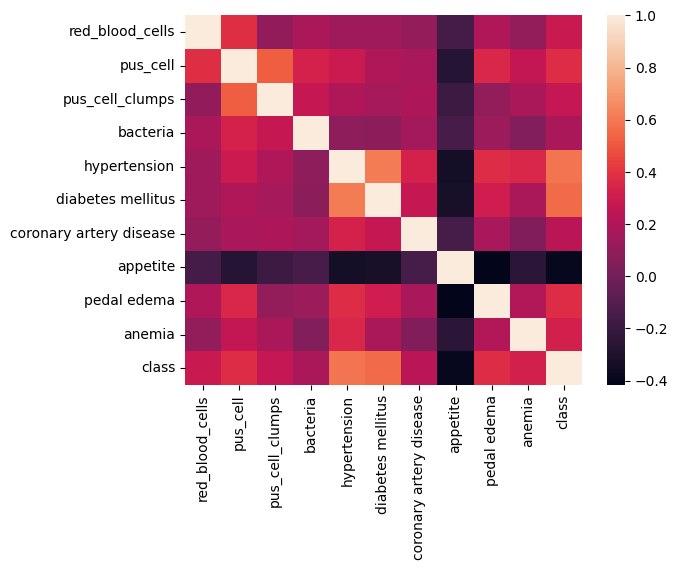

In [ ]:
sns.heatmap(cat.corr())

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'blood_glucose_random'}>],
       [<Axes: title={'center': 'blood_urea'}>,
        <Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'sodium'}>],
       [<Axes: title={'center': 'potassium'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'packed cell volume'}>],
       [<Axes: title={'center': 'white blood cell count'}>,
        <Axes: title={'center': 'red blood cell count'}>, <Axes: >]],
      dtype=object)

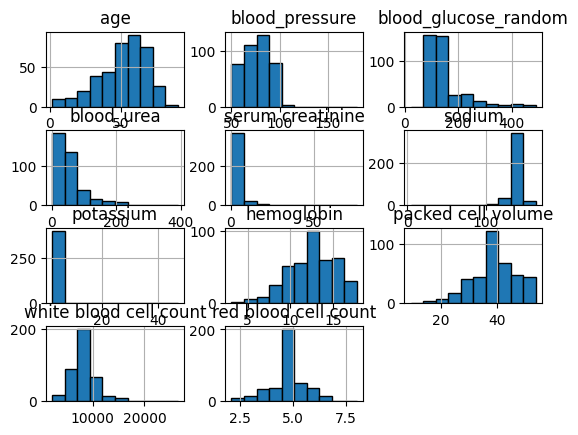

In [ ]:
num.hist(edgecolor = 'black', linewidth = 1.0)

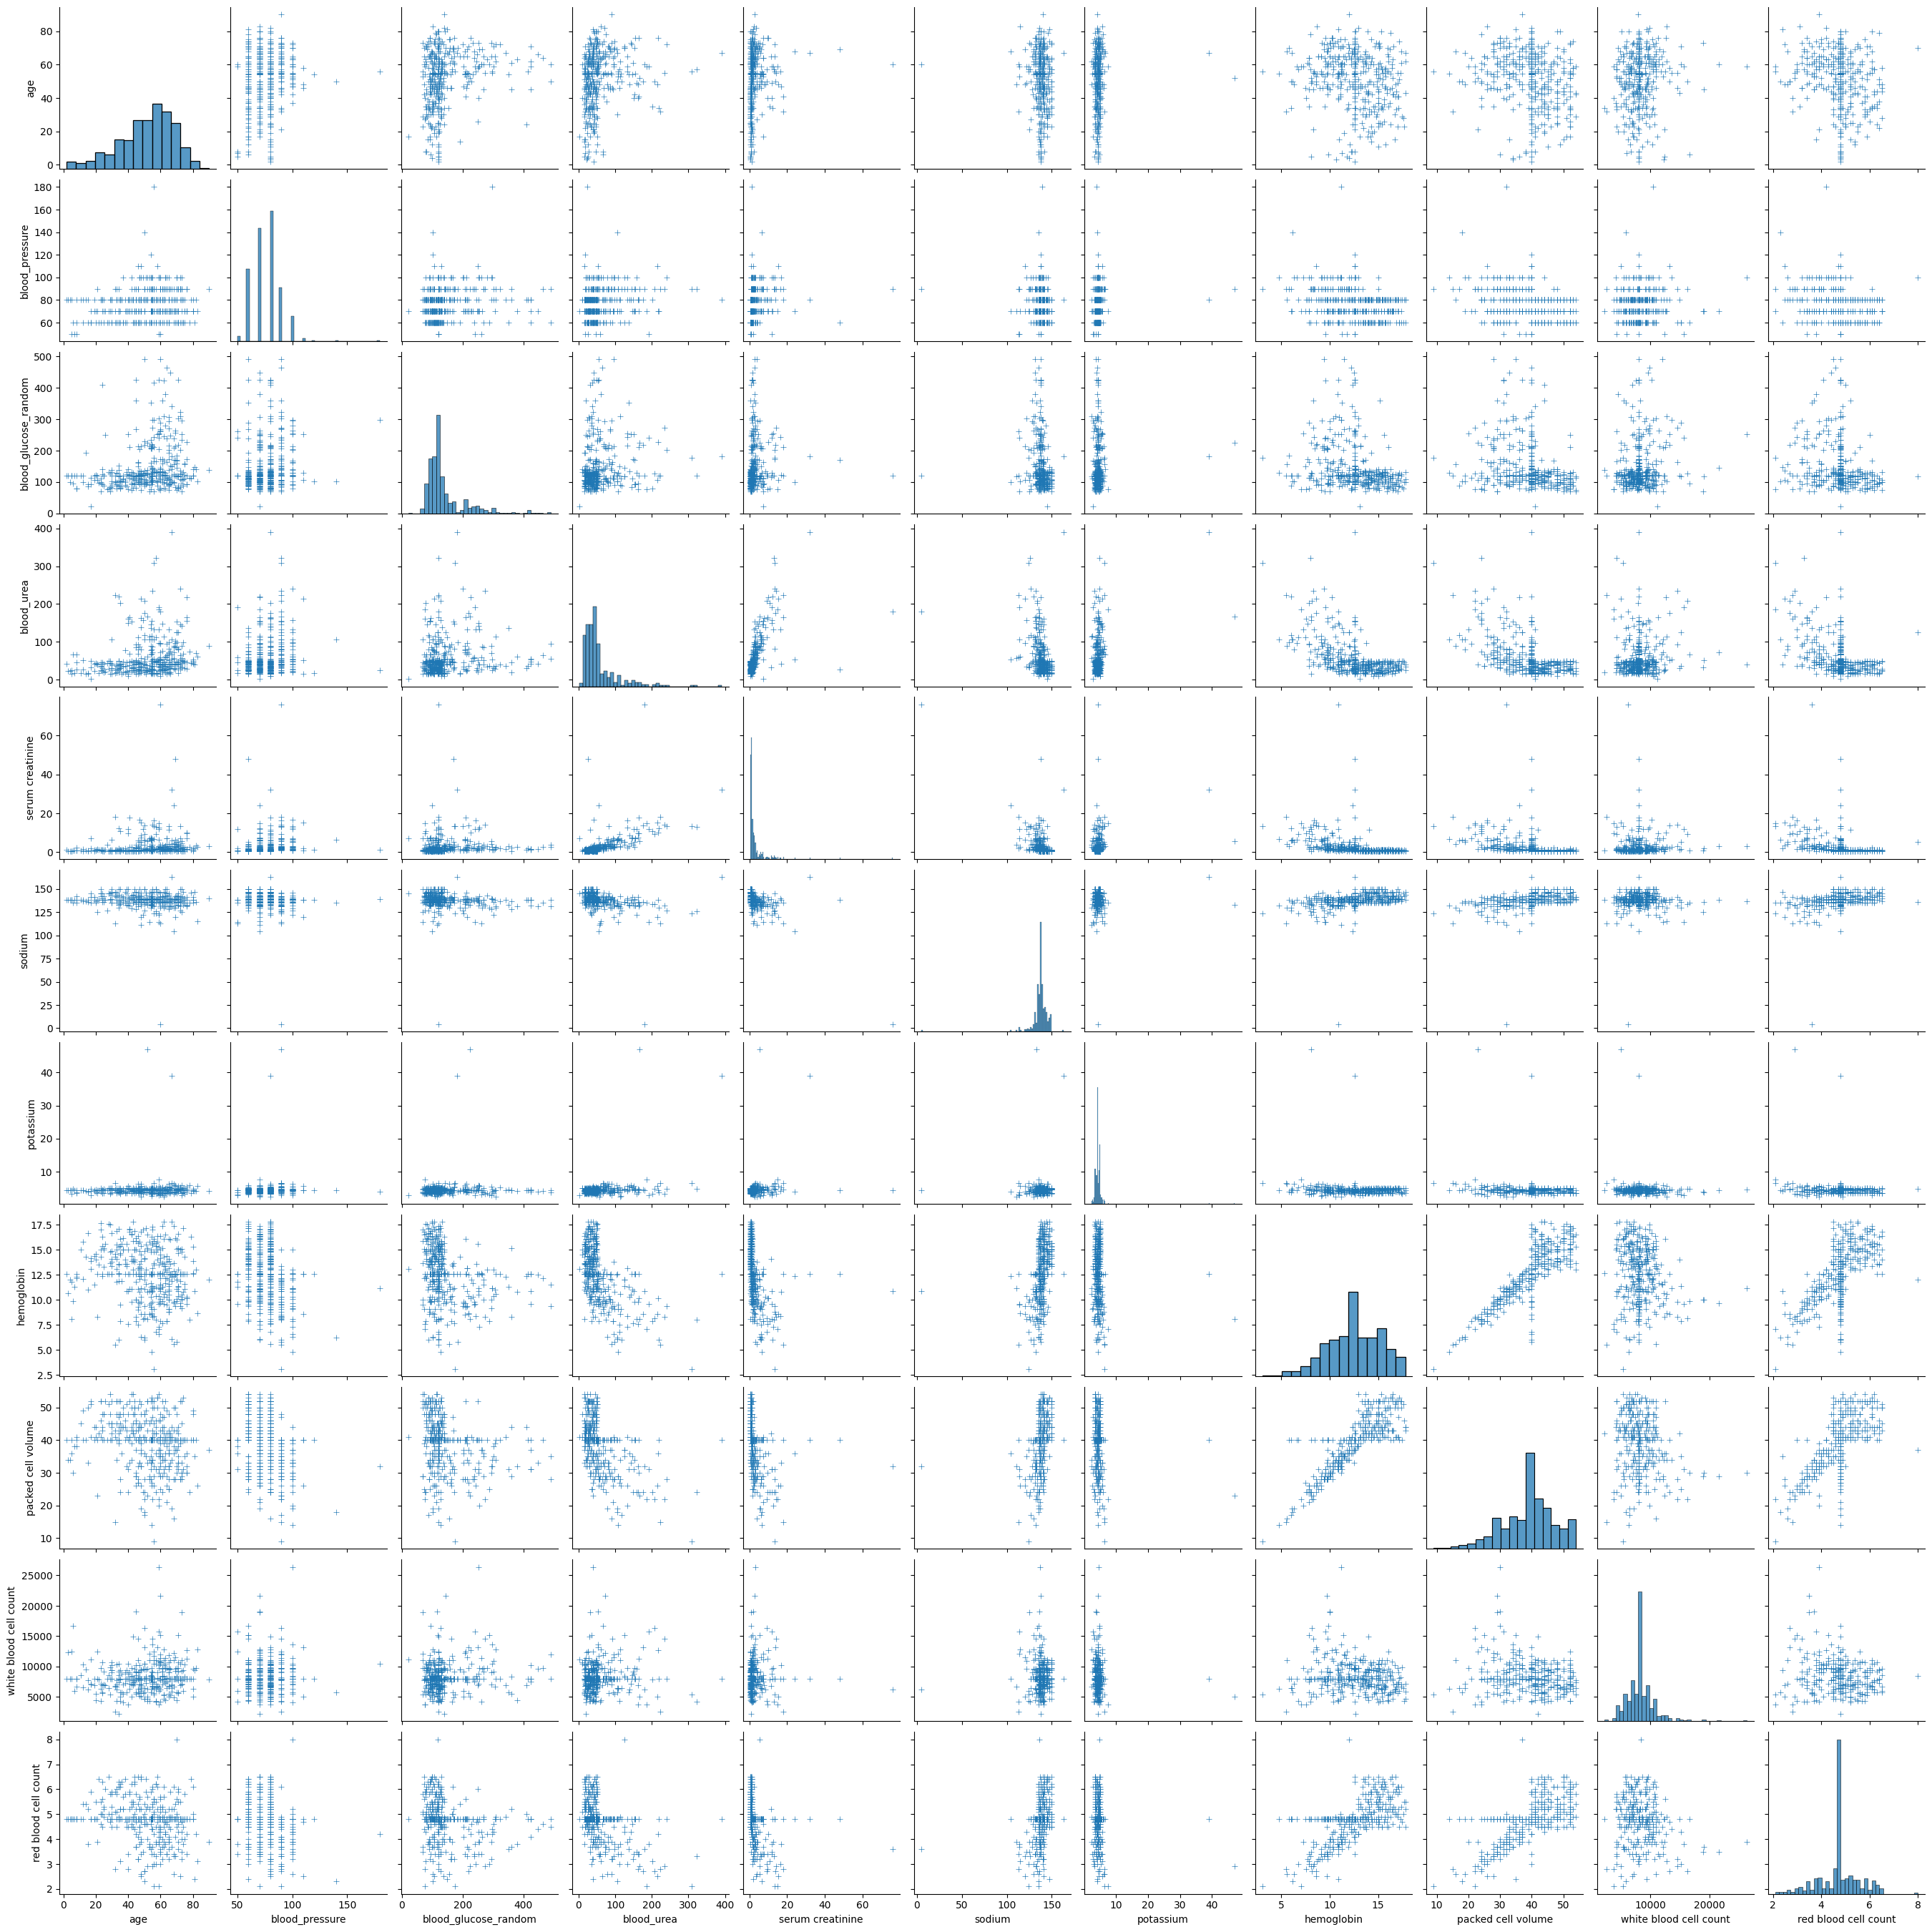

In [ ]:
g = sns.pairplot(num,markers='+')
plt.show()

In [ ]:
df = pd.concat([num,cat],axis=1)

### Spliting of x and y

In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
y.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
